In [1]:
# libraries
import csv
import pandas as pd
import numpy as np
from random import shuffle
import warnings
warnings.filterwarnings('ignore')

## 1. The Dataset: Titanic data

#### The Titanic dataset is a classification dataset: it is used for a prediction task where the goal is to determine whether a person survived the 1912 shipwreck of the RMS Titanic. The list of attributes is as follows:

- output variable: **Survival**, 0 = did not survive, 1 = did survive
- input features:
    - **Pclass**: ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
    - **Sex**: male or female
    - **Age**: quantitative continuous variable
    - **Sibsp**: # of siblings / spouses aboard the Titanic
    - **Parch**: # of parents / children aboard the Titanic	
    - **Ticket**: ticket number
    - **Fare**: passenger fare
    - **Cabin**: cabin number
    - **Embarked**: port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [2]:
df = pd.read_csv("titanic-train.csv", na_values=['none'])
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.fillna('', inplace=True)
df["Age"] = df["Age"].apply(lambda x: 0 if x == "" else x)
df["Cabin"] = df["Cabin"].apply(lambda x: "Unknown" if x == "" else x)
df["Embarked"] = df["Embarked"].apply(lambda x: "Unknown" if x == "" else x)
df["Pclass"] = df["Pclass"].apply(lambda x: str(x))


train_cols = [df.columns[0]] + list(df.columns[2:])
label = df.columns[1]
X_df = df[train_cols]
y_df = df[label]

X_display = X_df.copy()

#Converting strings to integers and floats for categorical data
categorical_cols = ["Pclass", "Name", "Sex", "Ticket", "Cabin", "Embarked"]

for col in categorical_cols:
    X_df[col] = pd.Categorical(X_df[col])
    X_df[col] = X_df[col].cat.codes

dataset = {
    'X': X_df,
    'y': y_df
}

df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Unknown,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,Unknown,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,Unknown,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,Unknown,C


In [3]:
# Use this cell for any data-related exploration

## 2. The Model: LightGBM, with explanation tool SHAP

In [4]:
import shap
import lightgbm as lgb
from sklearn.model_selection import train_test_split

# print the JS visualization code to the notebook
shap.initjs()

# create a train/test split
seed = 1
X_train, X_test, y_train, y_test = train_test_split(dataset['X'],dataset['y'], test_size=0.25, random_state=seed)

d_train = lgb.Dataset(X_train, label=y_train)
d_test = lgb.Dataset(X_test, label=y_test)

# train a lightgbm for the training dataset
model = lgb.train({}, d_train)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000776 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 668, number of used features: 11
[LightGBM] [Info] Start training from score 0.369760
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [5]:
#Training accuracy
train_pred = model.predict(X_train).tolist()
train_pred = [0 if x<=0.5 else 1 for x in train_pred]
accuracy_train = round(sum(train_pred == y_train) / len(train_pred), 5)

#Test set accuracy
predictions = model.predict(X_test).tolist()
predictions = [0 if x <= 0.5 else 1 for x in predictions]

accuracy_test = round(sum(predictions == y_test) / len(predictions), 5)

print("The accuracy of the model on the training set is: ", accuracy_train)
print("The accuracy of the model on the test set is: ", accuracy_test)

indices = [index for index, value in enumerate(zip(predictions, y_test.tolist())) if value[0] != value[1]]
shuffle(indices)

The accuracy of the model on the training set is:  0.99701
The accuracy of the model on the test set is:  0.77578


### Visualize Global Explanations: What the model learned overall from training data

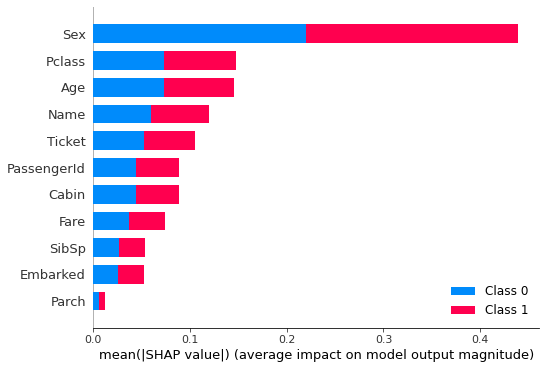

In [6]:
model.params['objective'] = 'binary'
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(dataset['X'])
shap.summary_plot(shap_values, dataset['X'], plot_type="bar")

### Visualize Global Explanations for Specific Input Features: What the model learned about a feature from the training data


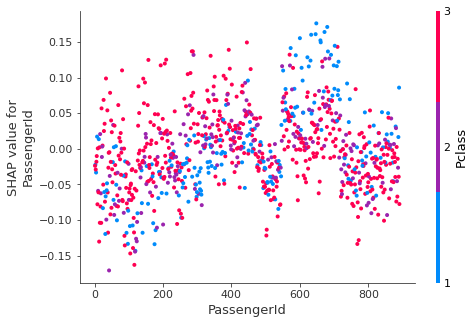

In [7]:
#Visualizing one feature here, but you can visualize all features by uncommenting the code below
shap.dependence_plot(X_train.columns[0], shap_values[1], dataset['X'], display_features=X_display)

# VISUALIZE ALL INPUT FEATURES [Uncomment code below]

# for name in X_train.columns:
#     shap.dependence_plot(name, shap_values[1], dataset['X'], display_features=X_display)

### Visualize Local Explanations: How an individual prediction was made

In [8]:
shap_values_test = explainer.shap_values(X_test)

def get_display_features(testidx):
    testcase = X_test.iloc[testidx, :]

    idx = dataset['X'].index[(dataset['X']['PassengerId'] == testcase['PassengerId']) & (dataset['X']['Pclass'] == testcase['Pclass']) & 
                     (dataset['X']['Name'] == testcase['Name']) & (dataset['X']['Sex'] == testcase['Sex']) &
                    (dataset['X']['Age'] == testcase['Age']) & (dataset['X']['SibSp'] == testcase['SibSp']) & 
                    (dataset['X']['Parch'] == testcase['Parch']) & (dataset['X']['Ticket'] == testcase['Ticket']) & 
                    (dataset['X']['Fare'] == testcase['Fare']) & (dataset['X']['Cabin'] == testcase['Cabin']) &
                    (dataset['X']['Embarked'] == testcase['Embarked'])
                    ]
    return idx

#Enter a test index you want to test
TEST_IDX = 10
idx = get_display_features(TEST_IDX)

In [9]:
shap.force_plot(explainer.expected_value[1], shap_values[1][TEST_IDX,:], X_display.iloc[idx[0],:])